In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<h1> Análise de dados do Spotify Top chart songs 2022<h1>

Breno Menezes - João gabriel Nascimento - Victor Paiva

<h3>Esse estudo tem como objetivo analisar as musicas mais tocadas de 2022 e descibrir, com base no dataset e as informações fornecidas, o que essas músicas possuem em comum para alcançar as posições atingidas.<h3>

In [10]:
df = pd.read_csv("spotify_top_charts_22.csv")
display(df)

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,spotify:track:0So2sgVa8aJiARPl2P29u2,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,spotify:track:1TUuhV75FeOF6UObRsABo2,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,spotify:track:3GbQcjKWT7eVpUfzqwUjxv,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,spotify:track:7My9ca9QEIR8MvIOdIrTWA,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


A base de dados possui 646 linhas (faixas) e 17 colunas, sendo elas:

uri: o link para as musicas no spotify.

artist_names: o nome dos artistas da música como está cadastrado no spotify.

track_name: o nome das faixas como está no spotify.

peak_rank: o maior ranking atingido pelas músicas no top songs.

weeks_on_chart: o número de semanas em que as músicas ficaram no top songs.

danceability: descreve o quão "dançante" é a música em uma escala de 0.0 a 1.0 com base em uma combinação de elementos incluindo o ritmo.

energy: é uma medida de 0.0 a 1.0 e represente uma medida perceptual de intensidade e atividade. Tipicamente, faixas energéticas.

Key: indica a tonalidade da música usando a notação padrão de Classe de Tom. Por exemplo, 0 = C, 1 = C#/Db, 2 = D e etc.

loudness: O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados com base em toda a faixa.

mode: Modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala a partir da qual seu conteúdo melódico é derivado.

speechness: se refere a presença de vocalização na música, ou seja, a parte da musica que possui voz(com letra ou não).

acousticness: medida que quantifica o quão acústica ou não eletrônica é a música.

instrumentalness: quantifica a presença de instrumentos musicais na faixa.

liveness: indica o quão propensa a música é de ser uma gravação ao vivo.

tempo: indica o tempo da música em bpm( batidas por minuto).

time_signature: indica o compasso da música.

duration_ms: indica a duração da música em milisegundos.

<h3>Pré-processamento dos dados:<h3>

Por ser uma base utilizada em outros estudos e importada de um site apenas para base de dados, não foi encontrada nenhuma inconsistência, ausência ou problema que afetasse a análise, da mesma forma que todos os dados que necessitavam foram previamente transformados de categóricos para quantitativos.

Pórem, para o estudo realizado, avaliando as colunas apresentadas, a primera coluna, dos links ("uri"), foi avaliada como desnecessaria e sem valor para o estudo e, dessa forma, retirada do dataset na limpeza para melhor vizualização e eficiência.

In [11]:
df = df.iloc[:, 1:]
display(df)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


<h3>Perguntas:<h3>

Não existe receita ou fórmula mágica para se criar uma muúsica de sucesso, isso é fato. Todavia, esse estudo e as perguntas formuladas bascam achar semalhanças, características em comum e relações entre as mussicas do "top chart 2022", para que, através dessas descobertas, possamos entender melhor os padrões e características indispensáveis para chegara no topo das paradas de sucesso.

<h5>1. Qual o compasso mais se repetiu entre as músicas?<h5>

Um compasso musical é uma unidade de medida que divide uma peça musical em partes iguais e regularmente espaçadas de tempo. Ele é usado para organizar as notas musicais em uma composição, proporcionando uma estrutura rítmica e facilitando a interpretação e a leitura da música. Dessa forma o compasso é uma peça chave para entender melhor a cadência da música e como ela se organiza, de forma mais lenta ou acelerada, por exemplo.

In [12]:
comp_freq = df['time_signature'].value_counts()

In [13]:
more_freq = comp_freq.idxmax()
qtd_more_freq = more_freq.max()
print(qtd_more_freq)

4


sendo assim, o compasso mais frequente entre as faixar analisadas é o 4/4.

<h5>2. Qual o tempo médio entre as músicas da base de dados ?<h5>

Pode não estar aparente, mas a duração da música quer dizer muita coisa sobre a obra, pode tornar a música chata e repetitiva se for muito longa ou deixar o ouvinte desapontado com o pouco tempo da faixa se for muito curta, entre outras coisas. Com o lançamento de aplicativos de vídeo de curta duração e o constante uso das redes sociais, as coisas se tornaram mais rápidas e para prender nos primeiros segundos. Desse modo, essa pergunta e sua resposta buscam avaliar a duração média das músicas e descobrir se elas também estão tendendo cada vez mais a se tornar mais curtas ou não. 

In [14]:
duration = df['duration_ms']

In [15]:
info_duration = duration.describe()
mean_ms = info_duration.loc['mean']

print(mean_ms)

203629.85913312694


In [16]:
mean_min = (mean_ms/1000)/60
print(mean_min)

3.3938309855521154


Portanto, em média, as músicas possuem 3,4 minutos.

3. Qual o tom predominante nas músicas do ranking. É uma tonalidade maior ou menor?

In [17]:
key_freq = df['key'].value_counts()
print(key_freq)

key
1     104
8      65
0      63
2      56
5      55
11     54
7      52
4      45
10     45
9      42
6      38
3      27
Name: count, dtype: int64


In [18]:
more_freq_key = key_freq.idxmax()
qtd_more_freq_key = key_freq.max()
print("Tonalidade mais frequente:", more_freq_key)
print("Quantidade de vezes que apareceu:", qtd_more_freq_key)

Tonalidade mais frequente: 1
Quantidade de vezes que apareceu: 104


In [19]:
modedf = df[df['key'] ==1 ]['mode']

In [20]:
mode_freq = modedf.value_counts()
display(mode_freq)

mode
1    65
0    39
Name: count, dtype: int64

In [21]:
more_freq_mode = mode_freq.idxmax()
qtd_more_freq_mode = mode_freq.max()
print("o tipo de tonalidade(maior ou menor) mais frequente:", more_freq_mode)
print("Quantidade de vezes que apareceu:", qtd_more_freq_mode)

o tipo de tonalidade(maior ou menor) mais frequente: 1
Quantidade de vezes que apareceu: 65


Dessa forma, a tonalidade mais freqeunte é de C#/Db maior

In [22]:
display(df)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


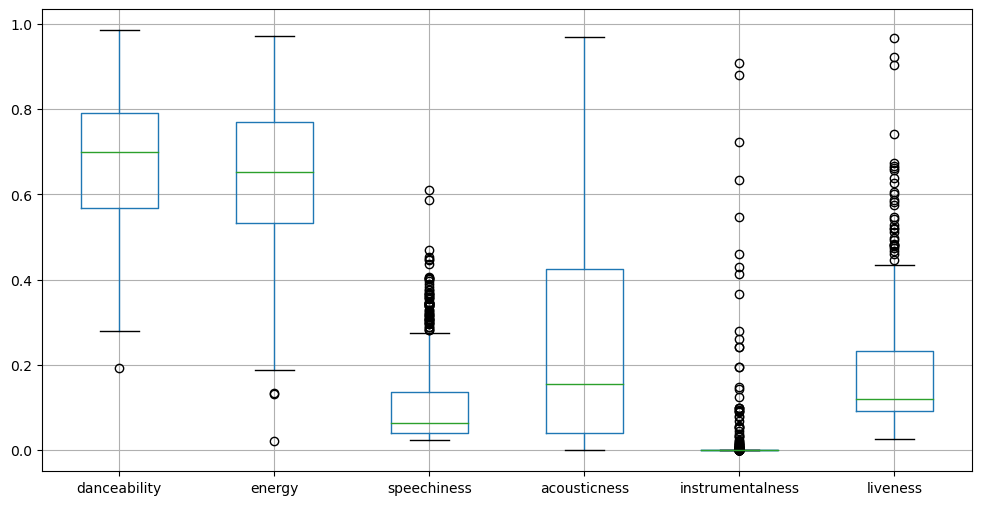

In [23]:
plt.figure(figsize=(12, 6))
df.boxplot(column=[ "danceability", "energy", "speechiness", "acousticness",
                   "instrumentalness", "liveness"])
plt.show()

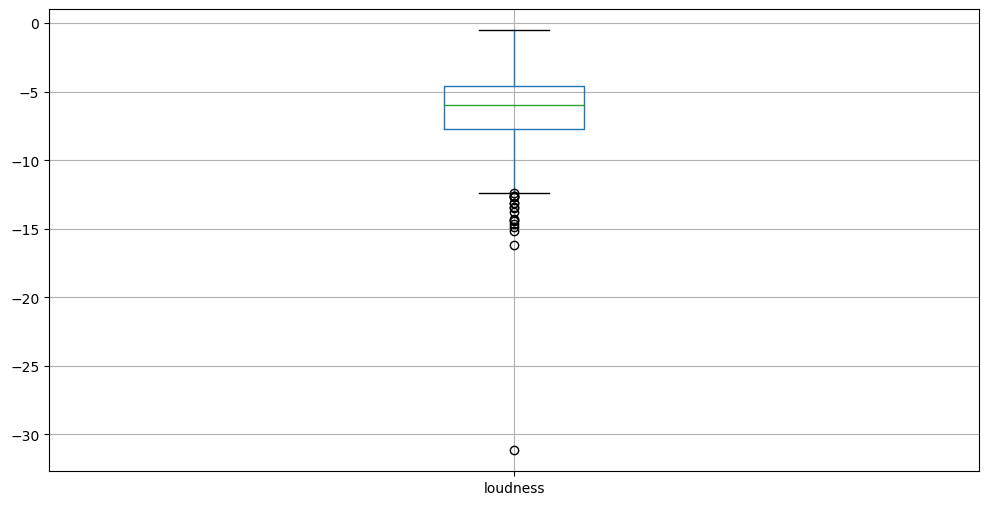

In [24]:
plt.figure(figsize=(12, 6))
df.boxplot(column= "loudness")
plt.show()

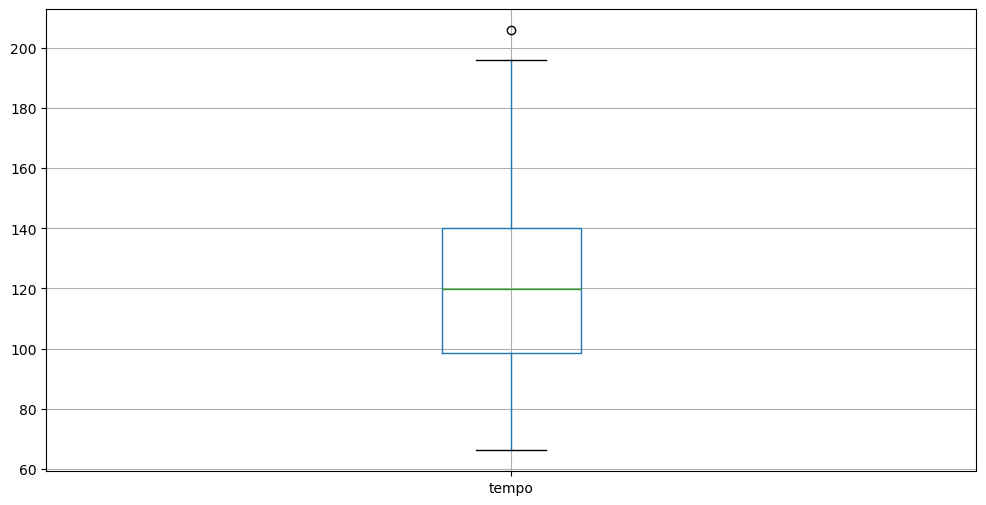

In [25]:
plt.figure(figsize=(12, 6))
df.boxplot(column= "tempo")
plt.show()

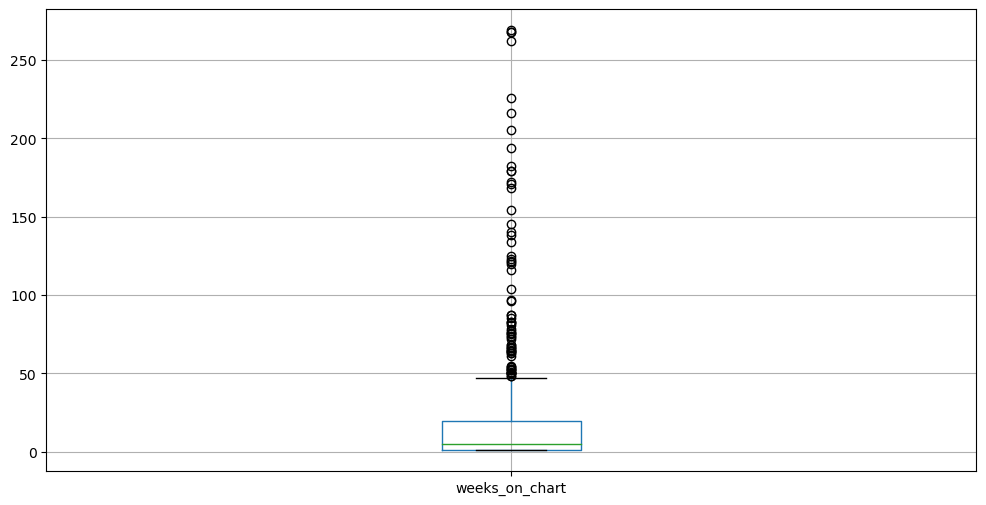

In [26]:
plt.figure(figsize=(12, 6))
df.boxplot(column= "weeks_on_chart")
plt.show()

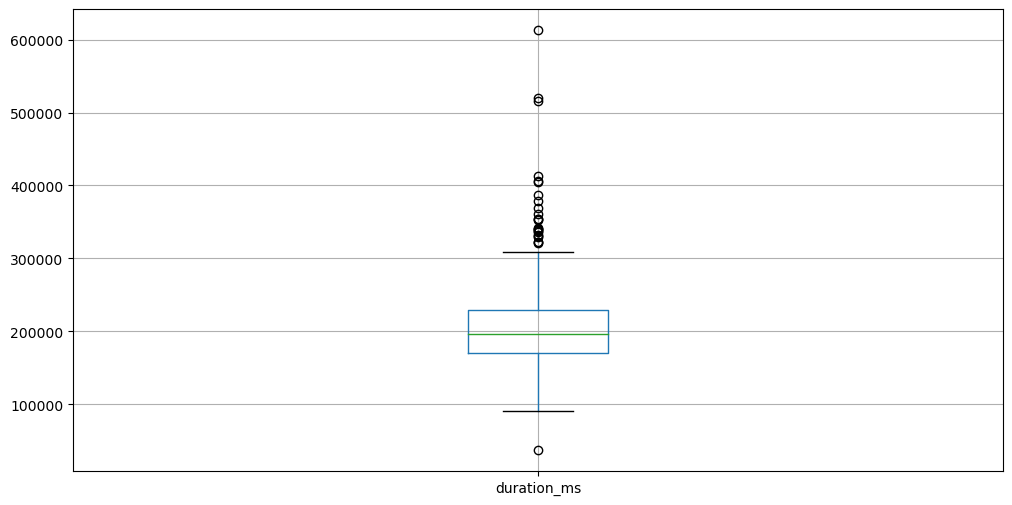

In [27]:
plt.figure(figsize=(12, 6))
df.boxplot(column= "duration_ms")
plt.show()

In [28]:
display(df)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


• Gráfico de dispersão para analisar correlação e tendências de duas variáveis

    Analisando a correlação entre o período em semanas "x" música ficou no top charts e a sua maior posição no ranking.

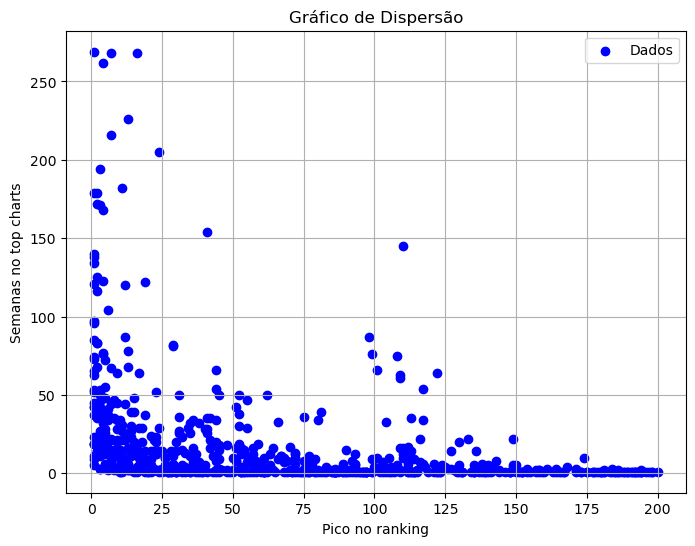

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['peak_rank'], df['weeks_on_chart'], label='Dados', color='blue', marker='o')
plt.xlabel('Pico no ranking')
plt.ylabel('Semanas no top charts')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.grid(True)
plt.show()

É evidente que a grande maioria das músicas presentes no top 200 tem uma permanência no ranking de apenas 0 a 50 semanas. Aquelas que conseguem superar esse limite são, geralmente, as que ocuparam as primeiras colocações. Essa dispersão de músicas de curta duração no topo do ranking é uma característica comum em listas de reprodução de músicas populares, devido ao fato de que elas tendem a ter um ciclo de vida curto em termos de popularidade. Em outras palavras, a maioria das músicas pop alcança um grande sucesso, mas por um período relativamente curto. Isso pode ser atribuído, em parte, à sua simplicidade sonora, que pode levar os ouvintes a perderem o interesse após um certo tempo, rotulando as músicas como repetitivas ou enjoativas.

Há exceções que demonstram que o gênero musical pode se destacar e desenvolver uma imagem própria de forma mais duradoura, mas esses casos são significativamente menos comuns, como podemos observar no gráfico.

• Histograma para entender frequências dos dados

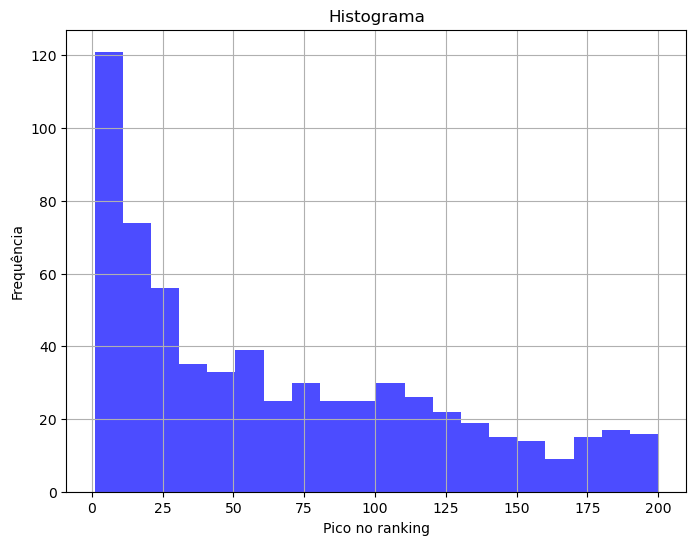

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(df['peak_rank'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Pico no ranking')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.grid(True)
plt.show()

O gráfico acima representa a frequência com que picos de classificação foram alcançados. Em outras palavras, ele ilustra quantas músicas e artistas distintos conseguiram atingir uma posição específica no ranking. Como podemos notar no gráfico, posições elevadas são frequentemente ocupadas por diversas músicas distintas. Isso pode ser atribuído à dinamicidade das músicas pop, que demanda constantemente a criação de novo conteúdo para manter o interesse do público.

• Gráfico de barra ou linha de acordo com o tipo de dado trabalhado

Gráfico da frequência que a base sonora da música se repete nos charts.

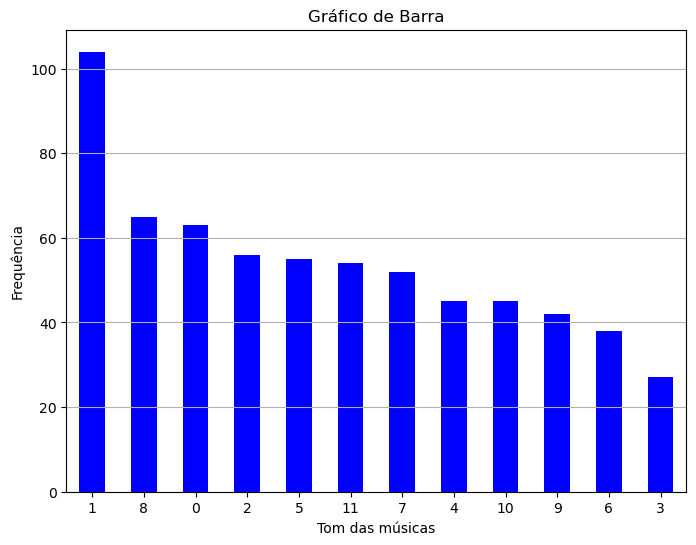

In [31]:
plt.figure(figsize=(8, 6))
df['key'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Tom das músicas')
plt.ylabel('Frequência')
plt.title('Gráfico de Barra')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

O gráfico apresenta a frequência com que as músicas constroem sua estrutura em torno de uma nota musical específica. Conforme evidenciado no gráfico, a "key 1", que corresponde a nota A (Lá em português), é a tonalidade mais comum no top 200. Também é perceptível que a menos utilizada em músicas populares é a "key 3", que corresponde à nota B (Si em português). Isso pode se dar pelo fato de compositores e músicos podem preferir tonalidades mais fáceis de tocar e cantar. A escolha de tonalidades com menos acidentes musicais (sustenidos e bemóis) pode facilitar a execução da música. Quanto à tonalidade menos utilizada, como a "key 3" (nota B ou Si), sua raridade pode ser explicada pelo fato de que pode ser percebida como menos familiar ou menos acessível para o público em geral. Músicas nessa tonalidade podem ter um apelo mais restrito e podem não se encaixar tão bem nas convenções estilísticas predominantes, sendo mais presentes ao recorrer da música ao invés da música basear sua estrutura em volta dessa nota.

# Agrupamento

Nesta seção do relatório, será realizada uma etapa de agrupamento de dados, conhecida como clusterização. A clusterização é uma técnica, que consiste em organizar os dados em grupos ou "clusters" com base em suas características semelhantes. O objetivo principal dessa abordagem é identificar padrões, facilitando a compreensão a partir deles.

<Axes: xlabel='energy', ylabel='acousticness'>

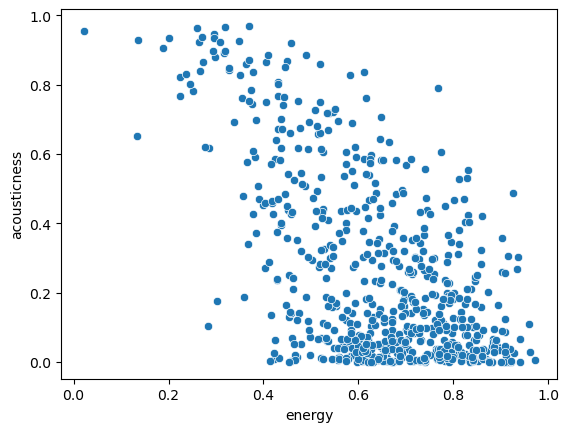

In [32]:
sns.scatterplot(data=df, x="energy", y="acousticness")

A ferramenta que iremos usar para o agrupamento será o uso do k-means; que é um algoritmo que é usado para separar os grupos em k clusters, o numero de k será escolhido por mim . O objetivo do k-Means é encontrar centroides para cada um desses clusters de forma a minimizar a soma das distâncias entre os elementos de dados e o centro do cluster mais próximo , fazendo assim os elementos mais proximos dos seus respectivos custers terem provavelmente um padrão.

#### Perguntas:

<h5>Como saber qual é melhor número de centroids para esse gráfico? 

Existe algum padrão entre "energy" e "acousticness"?<h5>

In [33]:
df_group = df[["energy", "acousticness"]]

In [34]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(df_group)

<Axes: xlabel='energy', ylabel='acousticness'>

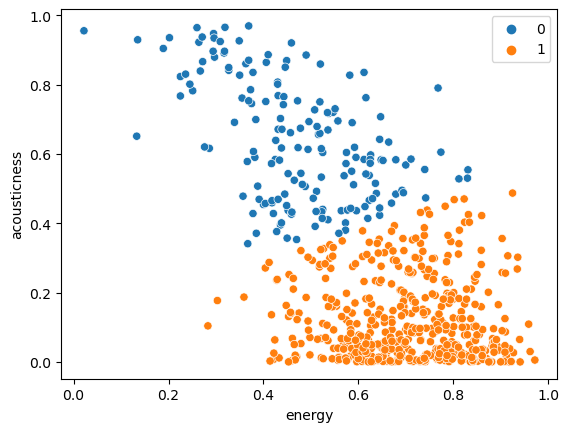

In [35]:
sns.scatterplot(data=df_group, x="energy", y="acousticness", hue=kmeans.labels_)

Este é um k-means com 2 centroides, se observarmos percebemos que alem dos grupos serem bem extensos e alguns elementos do mesmo ficarem longe um do outro temos uma relação inversamente proporcional entre energy e acousticness onde  um grupo tem mais energy e menos acousticness e o outro o contrario.

In [36]:
kmeans3 = KMeans(n_clusters=3, n_init=10).fit(df_group)

<Axes: xlabel='energy', ylabel='acousticness'>

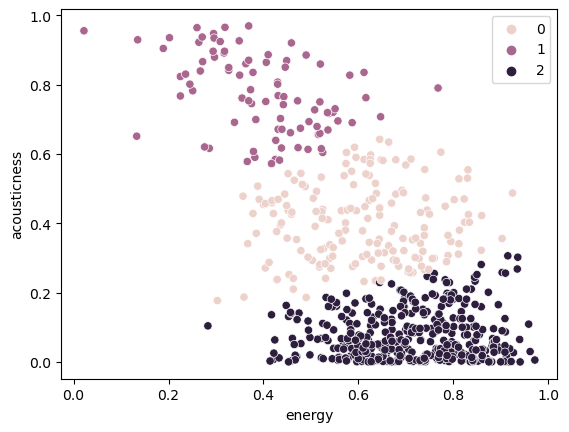

In [37]:
sns.scatterplot(data=df_group, x="energy", y="acousticness", hue=kmeans3.labels_)

Este é um k-means com 3 centroides, , observamos que a distância entre os elementos dentro de cada grupo e seus respectivos centroides diminuiu,alem disso ainda temos uma relação consistente entre as características 'energy' e 'acousticness' nos grupos existentes, com um novo grupo sendo introduzido que apresenta um equilíbrio, com valores medianos tanto para 'energy' quanto para 'acousticness'. 

In [38]:
kmeans4 = KMeans(n_clusters=4, n_init=10).fit(df_group)

<Axes: xlabel='energy', ylabel='acousticness'>

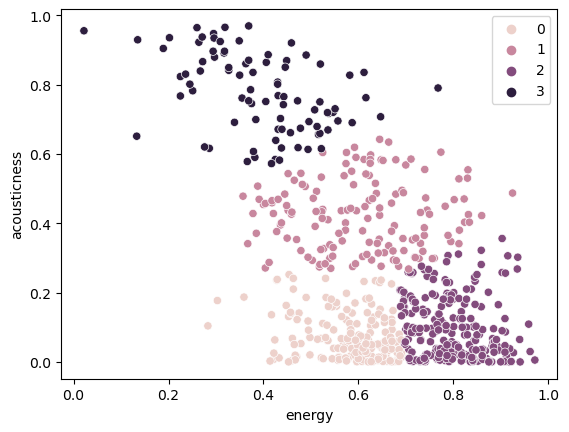

In [39]:
sns.scatterplot(data=df_group, x="energy", y="acousticness", hue=kmeans4.labels_)

Neste exemplo com 4 centroides, notamos que o grupo original, caracterizado por alta 'energy' e baixa 'acousticness', foi dividido em dois grupos distintos, resultando na perda de seu significado inicial. A introdução de mais centroides levou a uma segmentação excessiva, tornando o gráfico de clusters menos interpretável e eficaz

In [40]:
kmeans5 = KMeans(n_clusters=5, n_init=10).fit(df_group)


<Axes: xlabel='energy', ylabel='acousticness'>

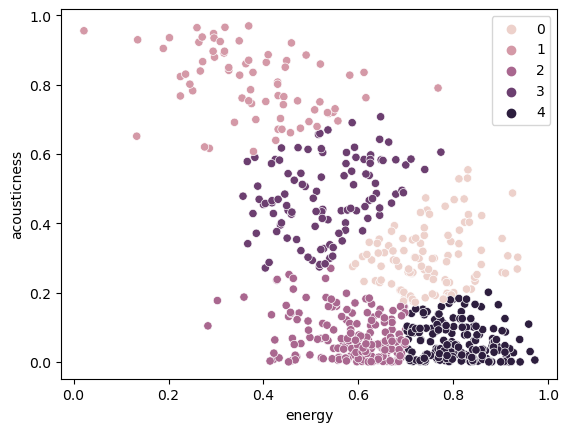

In [41]:
sns.scatterplot(data=df_group, x="energy", y="acousticness", hue=kmeans5.labels_)


Neste exemplo com 5 centroides, o problema observado no gráfico com 4 centroides foi agravado. A segmentação excessiva que já era evidente em uma configuração com 4 clusters tornou-se ainda mais pronunciada.

In [42]:
valores_k= []

inercias = []

for i in range (1,15):
    kmeans= KMeans (n_clusters =i,  n_init=10 , random_state=0).fit(df_group) 
    valores_k.append(i)
    inercias.append(kmeans. inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

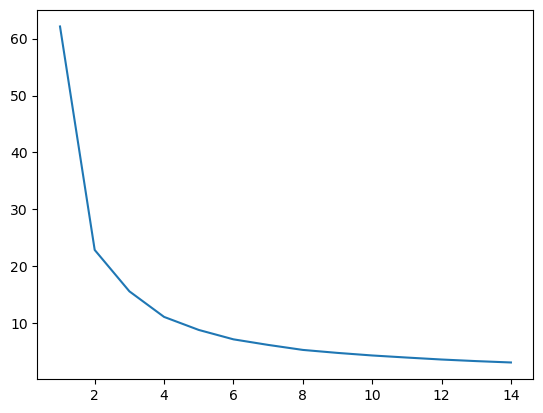

In [43]:
fig , ax = plt.subplots()

ax.plot(valores_k , inercias)

plt.show

Este é o grafico do cotovelo, a função dele é determinar qual o melhor numero de clusters(k) e tambem mostra em que ponto o acréscimo na quantidade de clusters não resulta em uma melhoria significativa na variabilidade intra-cluster. Em outras palavra ele representa a melhor quantidade de clusters para representar a estruturade dados que nesse caso pode ser 2 ou 3.

#### Respondendo as perguntas:


Como saber qual é melhor número de centroids para esse gráfico? 
R: Pelo grafico do cotovelo vemos que o melhor valor fica depois da "dobra" que no caso pode ser tanto 2 como 3  centroides.

Existe algum padrão entre "energy" e "acousticness"?
R: Sim, Vemos que energy e acousticness são inversamentes proporcionais, mas tem um ponto de equilibrio que foi visto no grafico com 3 centroides.